In [79]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [106]:
base_dir = "/home/li.mil/open-domain-mds-merge/open-mds/output/ms2_small/led-base"
uncertainty_path = "uncertainty/eval_results.json"
retrieval_path = "retrieval/dense/mean/eval_results.json"
# retrieval_path = "retrieval/test/eval_results.json"

uncertainty = os.path.join(base_dir, uncertainty_path)
retrieval = os.path.join(base_dir, retrieval_path)

retrieval_full = "/home/li.mil/open-domain-mds-merge/open-mds/output/ms2_small/led-base/retrieval/dense/mean/eval_results.json"

In [107]:
with open(uncertainty, "r") as f:
    data_uncertainty = json.load(f)

In [108]:
with open(retrieval, "r") as f:
    data_retrieval = json.load(f)

In [109]:
num_samples = len(data_uncertainty['bertscore_f1'])

In [110]:
print(f"Mean bertscore: uncertainty = {data_uncertainty['bertscore_f1_mean']}, \
baseline retrieval = {np.mean(data_retrieval['eval_bertscore_f1'])}")

print(f"Mean ROUGE-L: uncertainty = {data_uncertainty['rougeL_fmeasure_mean']}, \
baseline retrieval = {np.mean(data_retrieval['eval_rougeL_fmeasure'])}")

Mean bertscore: uncertainty = 5.384408976158847, baseline retrieval = 22.08435854962151
Mean ROUGE-L: uncertainty = 17.865078724138655, baseline retrieval = 20.971998372058795


In [112]:
uncertainty_bertscore = data_uncertainty['bertscore_f1']
uncertainty_rougeL = data_uncertainty['rougeL_fmeasure']

retrieval_bertscore = data_retrieval['eval_bertscore_f1']
retrieval_rougeL = data_retrieval['eval_rougeL_fmeasure']

Text(0.02, 0.5, 'Frequency')

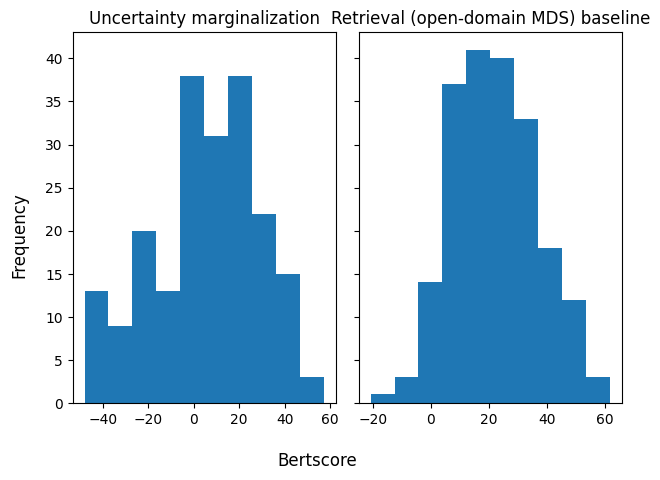

In [113]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.

n_bins = 10
axs[0].hist(uncertainty_bertscore, bins=n_bins)
axs[0].title.set_text("Uncertainty marginalization")
axs[1].hist(retrieval_bertscore, bins=n_bins)
axs[1].title.set_text("Retrieval (open-domain MDS) baseline")
fig.supxlabel('Bertscore')
fig.supylabel('Frequency')

Text(0.02, 0.5, 'Frequency')

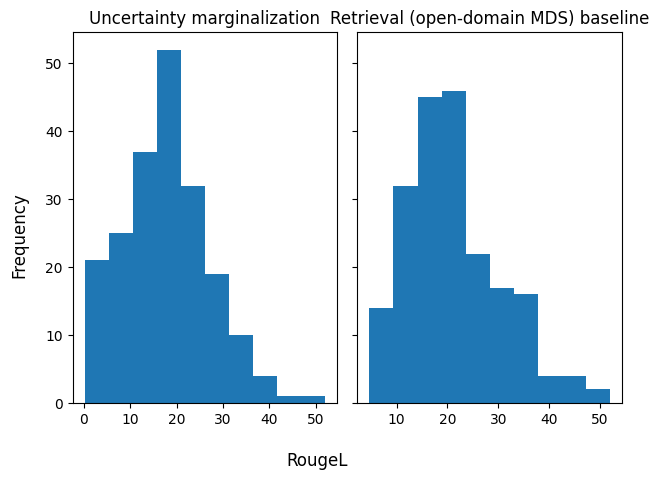

In [114]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.

n_bins = 10
axs[0].hist(uncertainty_rougeL, bins=n_bins)
axs[0].title.set_text("Uncertainty marginalization")
axs[1].hist(retrieval_rougeL, bins=n_bins)
axs[1].title.set_text("Retrieval (open-domain MDS) baseline")
fig.supxlabel('RougeL')
fig.supylabel('Frequency')

In [160]:
data_uncertainty['bertscore_f1']
bertscore_to_idx = {score: idx for idx, score in enumerate(data_uncertainty['bertscore_f1'])}

myKeys = list(bertscore_to_idx.keys())
myKeys.sort(reverse=True)
sorted_dict = {i: bertscore_to_idx[i] for i in myKeys}

In [181]:
data_uncertainty.keys()

dict_keys(['bertscore_f1', 'bertscore_f1_mean', 'bertscore_hashcode', 'bertscore_precision', 'bertscore_recall', 'input_len', 'inputs', 'label_len', 'labels', 'pred_len', 'preds', 'rouge1_fmeasure', 'rouge1_fmeasure_mean', 'rouge1_precision', 'rouge1_recall', 'rouge2_fmeasure', 'rouge2_fmeasure_mean', 'rouge2_precision', 'rouge2_recall', 'rougeL_fmeasure', 'rougeL_fmeasure_mean', 'rougeL_precision', 'rougeL_recall', 'rougeLsum_fmeasure', 'rougeLsum_fmeasure_mean', 'rougeLsum_precision', 'rougeLsum_recall', 'rouge_avg_fmeasure', 'rouge_avg_fmeasure_mean'])

In [146]:
data_uncertainty['preds'][134]

'The present meta- analysis suggests that probiotic supplementation during pregnancy and early infancy might be effective in reducing the risk of atopic diseases.'

In [147]:
data_retrieval['eval_preds'][134]

'Conclusions : This systematic review of the literature suggests that workplace interventions have a positive effect on musculoskeletal and visual symptoms among computer users.'

In [161]:
data_uncertainty['bertscore_f1'][134]

57.46612548828125

In [166]:
data_retrieval['eval_bertscore_f1'][134]

22.447271645069122

In [162]:
data_uncertainty['rougeL_fmeasure'][134]

40.0

In [163]:
data_retrieval['eval_rougeL_fmeasure'][134]

14.457831325301203

In [168]:
data_retrieval['eval_labels'][134]

'Moderate evidence was observed for : ( 1 ) no effect of workstation adjustment, ( 2 ) no effect of rest breaks and exercise and ( 3 ) positive effect of alternative pointing devices.\nFor all other interventions mixed or insufficient evidence of effect was observed.\nConclusion : Few high quality studies were found that examined the effects of interventions in the office on musculoskeletal or visual health'

In [179]:
data_uncertainty['labels']

['For those surrogate outcomes, low-strength evidence failed to show difference.\nIn subgroup analysis, high strength evidence supported a lower BP with HBPT that lasted for 6 or 12 months and was accompanied with counselling support from study personnel.\nHBPT can improve BP control in the hypertensive patients.\nIt may be more efficacious when a proactive additional support is provided during the intervention process',
 'This systematic review suggests that supplementation with phytonadione and menaquinone-4 reduces bone loss.\nIn the case of the latter, there is a strong effect on incident fractures among Japanese patients',
 'These results showed that AF is an independent risk factor for MI, CV death, and CV events',
 'Conclusions Exercise-based cardiac rehabilitation is effective at reducing important clinical outcomes in patients with coronary heart disease.\nWhile our analysis was constrained by the quality of included trials and missing information about intervention components

In [180]:
data_retrieval['eval_labels']

['Current evidence from systematic review and meta- analysis revealed that probiotics are the most promising intervention in reduction of the incidence of NEC in VLBW neonates.\nAs per the evidence, prebiotics modulate the composition of human intestine microflora to the benefit of the host by suppression of colonization of harmful microorganism and /or the stimulation of bifidobacterial growth, decreased stool viscosity, reduced gastrointestinal transit time, and better feed tolerance.',
 'The use of glucomannan did not appear to significantly alter any other study endpoints.\nPediatric patients, patients receiving dietary modification, and patients with impaired glucose metabolism did not benefit from glucomannan to the same degree.\nGlucomannan appears to beneficially affect total cholesterol, LDL cholesterol, triglycerides, body weight, and FBG, but not HDL cholesterol or BP',
 'Ensuring that the characteristics of the history and future ascents are similar may improve the clinical

In [170]:
len(data_retrieval['eval_labels'])

202

In [171]:
len(data_uncertainty['labels'])

202